In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
target = diabetes['Outcome']
data = diabetes.drop(['Outcome'], axis=1)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
data.isna().sum().max()

0

---

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = .9, random_state=1)

DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)


Test Results
Accuracy: 0.6763005780346821
Recall: 0.634453781512605
Precision: 0.6763005780346821
f1: 0.6763005780346821
[[317 137]
 [ 87 151]]


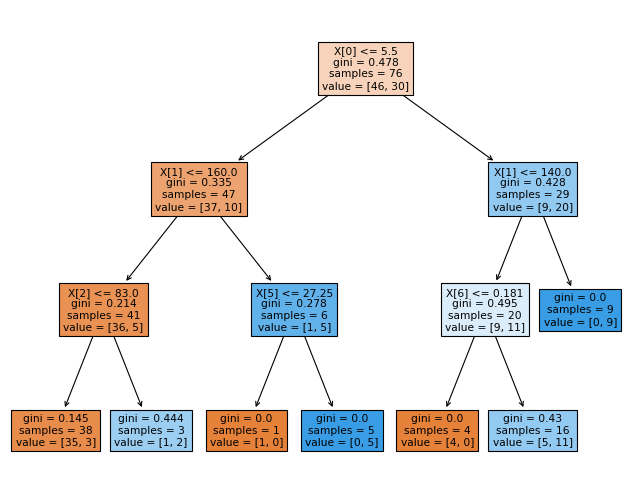

In [7]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('\nTest Results')
print('Accuracy: {}'.format(model.score(x_test, y_test)))
print('Recall: {}'.format(recall_score(y_test, model.predict(x_test))))
print('Precision: {}'.format(precision_score(y_test, y_pred, average='micro')))
print('f1: {}'.format(f1_score(y_test, y_pred, average='micro')))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_tree(model, filled=True)
plt.show()


Test Results
Accuracy: 0.7138728323699421
Recall: 0.5042016806722689
Precision: 0.7138728323699421
f1: 0.7138728323699421
[[374  80]
 [118 120]]


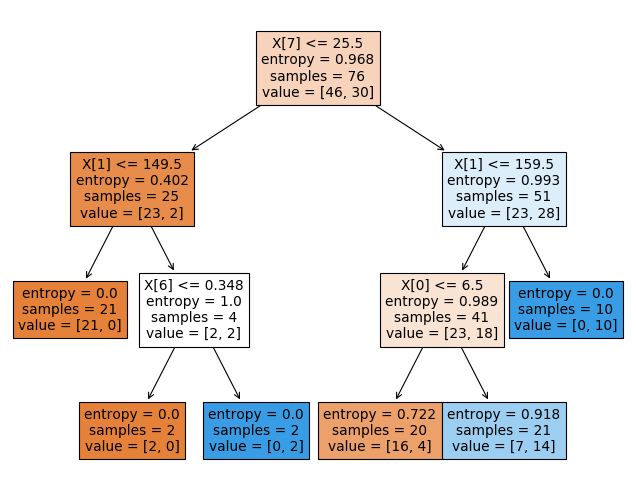

In [8]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('\nTest Results')
print('Accuracy: {}'.format(model.score(x_test, y_test)))
print('Recall: {}'.format(recall_score(y_test, model.predict(x_test))))
print('Precision: {}'.format(precision_score(y_test, y_pred, average='micro')))
print('f1: {}'.format(f1_score(y_test, y_pred, average='micro')))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_tree(model, filled=True)
plt.show()

---

In [9]:
fraud = pd.read_csv('MotorInsuranceFraudClaimABTFull .csv')
fraud.head()

,ID,Insurance Type,Income of Policy Holder,Marital Status,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
0,1,CI,0,NaN,2,Soft Tissue,No,1625,3250,2,2.0,1.0,0,1
1,2,CI,0,NaN,2,Back,Yes,15028,60112,1,0.0,0.0,15028,0
2,3,CI,54613,Married,1,Broken Limb,No,-99999,0,0,0.0,0.0,572,0
3,4,CI,0,NaN,3,Serious,Yes,270200,0,0,0.0,0.0,270200,0
4,5,CI,0,NaN,4,Soft Tissue,No,8869,0,0,0.0,0.0,0,1


In [10]:
fraud.isna().sum()

ID                           0
Insurance Type               0
Income of Policy Holder      0
Marital Status             330
Num Claimants                0
Injury Type                  0
Overnight Hospital Stay      0
Claim Amount                 0
Total Claimed                0
Num Claims                   0
Num Soft Tissue             10
% Soft Tissue                0
Claim Amount Received        0
Fraud Flag                   0
dtype: int64

In [11]:
fraud.describe()

,ID,Income of Policy Holder,Num Claimants,Claim Amount,Total Claimed,Num Claims,Num Soft Tissue,% Soft Tissue,Claim Amount Received,Fraud Flag
count,500.000000,500.000000,500.000000,500.00000,500.00000,500.000000,490.000000,500.000000,500.000000,500.000000
mean,250.500000,13739.994000,1.908000,16373.20400,9597.18600,0.798000,0.234694,0.172012,13051.942000,0.336000
std,144.481833,20081.535489,1.012713,29426.27696,35655.68622,2.666724,0.589635,0.428015,30547.194864,0.472812
min,1.000000,0.000000,1.000000,-99999.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.750000,0.000000,1.000000,3322.25000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,250.500000,0.000000,2.000000,5663.00000,0.00000,0.000000,0.000000,0.000000,3253.500000,0.000000
75%,375.250000,33918.500000,3.000000,12245.50000,11282.75000,1.000000,0.000000,0.000000,8191.750000,1.000000
max,500.000000,71284.000000,4.000000,270200.00000,729792.00000,56.000000,5.000000,2.000000,295303.000000,1.000000


In [12]:
fraud = fraud.drop(['Marital Status', 'ID', 'Insurance Type ','Claim Amount Received', 'Total Claimed'], axis=1)

In [13]:
fraud.loc[fraud['Num Soft Tissue'].isna(),['Num Soft Tissue']]=fraud['Num Soft Tissue'].mean()
fraud['Num Soft Tissue'].fillna(fraud['Num Soft Tissue'].mean(), inplace=True)

In [14]:
fraud.describe()

,Income of Policy Holder,Num Claimants,Claim Amount,Num Claims,Num Soft Tissue,% Soft Tissue,Fraud Flag
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,13739.994000,1.908000,16373.20400,0.798000,0.234694,0.172012,0.336000
std,20081.535489,1.012713,29426.27696,2.666724,0.583697,0.428015,0.472812
min,0.000000,1.000000,-99999.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3322.25000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,5663.00000,0.000000,0.000000,0.000000,0.000000
75%,33918.500000,3.000000,12245.50000,1.000000,0.000000,0.000000,1.000000
max,71284.000000,4.000000,270200.00000,56.000000,5.000000,2.000000,1.000000


In [15]:
fraud

,Income of Policy Holder,Num Claimants,Injury Type,Overnight Hospital Stay,Claim Amount,Num Claims,Num Soft Tissue,% Soft Tissue,Fraud Flag
0,0,2,Soft Tissue,No,1625,2,2.000000,1.0,1
1,0,2,Back,Yes,15028,1,0.000000,0.0,0
2,54613,1,Broken Limb,No,-99999,0,0.000000,0.0,0
3,0,3,Serious,Yes,270200,0,0.000000,0.0,0
4,0,4,Soft Tissue,No,8869,0,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...
495,0,1,Soft Tissue,No,2118,0,0.000000,0.0,1
496,29280,4,Broken Limb,Yes,3199,0,0.234694,0.0,1
497,0,1,Broken Limb,Yes,32469,0,0.000000,0.0,0
498,46683,1,Broken Limb,No,179448,0,0.000000,0.0,0


In [16]:
target = fraud['Fraud Flag']
data = fraud.drop(['Fraud Flag'], axis=1)
ohe = OneHotEncoder(categories='auto')
features = ohe.fit_transform(data[['Injury Type','Overnight Hospital Stay']]).toarray()
feature_labels = ohe.categories_
feature_labels


[array(['Back', 'Broken Limb', 'Serious', 'Soft Tissue'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [17]:
encode_overnight = {'No': 0, 
              'Yes': 1}
encode_injury = {'Back': 0, 
              'Broken Limb': 1, 
              'Serious': 2, 
              'Soft Tissue': 3}

In [18]:
data['Injury Type'] = data['Injury Type'].map(encode_injury).astype(int)
data['Overnight Hospital Stay'] = data['Overnight Hospital Stay'].map(encode_overnight)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = .9, random_state=1)


Test Results
Accuracy: 0.6755555555555556
Recall: 0.4934210526315789
Precision: 0.6755555555555556
f1: 0.6755555555555556
[[229  69]
 [ 77  75]]


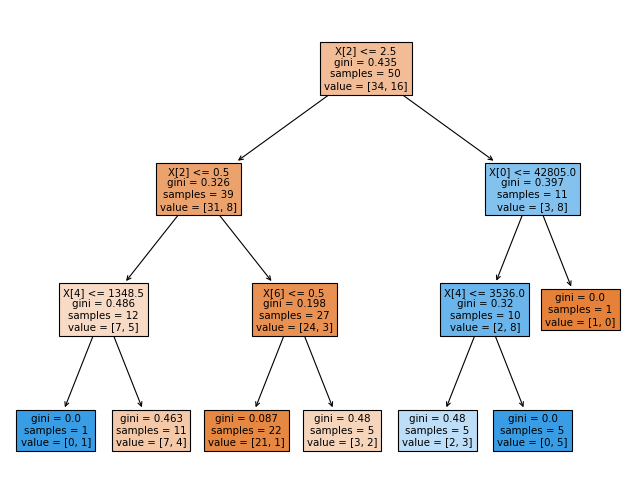

In [20]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('\nTest Results')
print('Accuracy: {}'.format(model.score(x_test, y_test)))
print('Recall: {}'.format(recall_score(y_test, model.predict(x_test))))
print('Precision: {}'.format(precision_score(y_test, y_pred, average='micro')))
print('f1: {}'.format(f1_score(y_test, y_pred, average='micro')))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_tree(model, filled=True)
plt.show()


Test Results
Accuracy: 0.6755555555555556
Recall: 0.4934210526315789
Precision: 0.6755555555555556
f1: 0.6755555555555556
[[229  69]
 [ 77  75]]


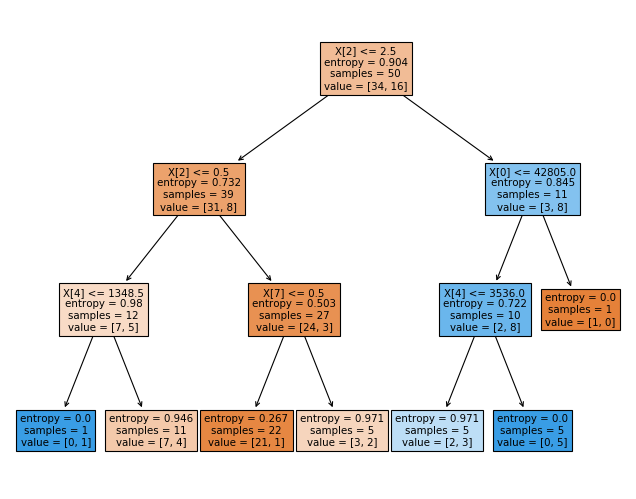

In [21]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('\nTest Results')
print('Accuracy: {}'.format(model.score(x_test, y_test)))
print('Recall: {}'.format(recall_score(y_test, model.predict(x_test))))
print('Precision: {}'.format(precision_score(y_test, y_pred, average='micro')))
print('f1: {}'.format(f1_score(y_test, y_pred, average='micro')))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_tree(model, filled=True)
plt.show()

---

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = .3, random_state=1)


Test Results
Accuracy: 0.72
Recall: 0.38
Precision: 0.72
f1: 0.72
[[89 11]
 [31 19]]


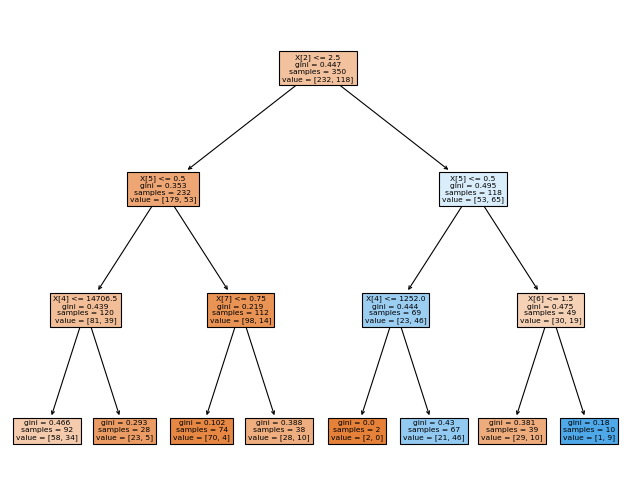

In [23]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('\nTest Results')
print('Accuracy: {}'.format(model.score(x_test, y_test)))
print('Recall: {}'.format(recall_score(y_test, model.predict(x_test))))
print('Precision: {}'.format(precision_score(y_test, y_pred, average='micro')))
print('f1: {}'.format(f1_score(y_test, y_pred, average='micro')))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_tree(model, filled=True)
plt.show()


Test Results
Accuracy: 0.7
Recall: 0.38
Precision: 0.7
f1: 0.7
[[86 14]
 [31 19]]


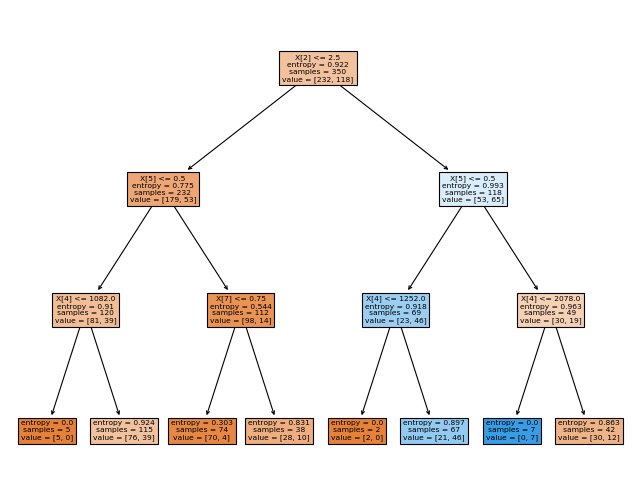

In [24]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('\nTest Results')
print('Accuracy: {}'.format(model.score(x_test, y_test)))
print('Recall: {}'.format(recall_score(y_test, model.predict(x_test))))
print('Precision: {}'.format(precision_score(y_test, y_pred, average='micro')))
print('f1: {}'.format(f1_score(y_test, y_pred, average='micro')))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_tree(model, filled=True)
plt.show()

---

Accuracy: 0.68


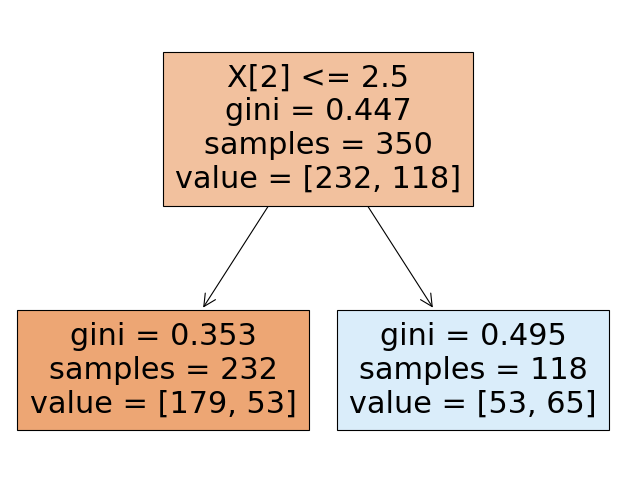

Accuracy: 0.7333333333333333


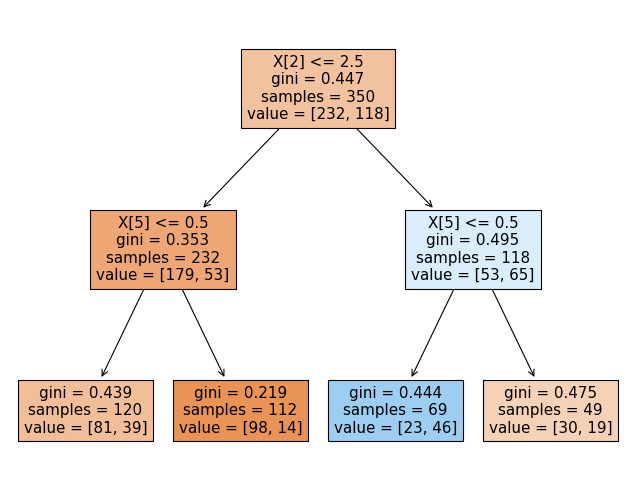

Accuracy: 0.72


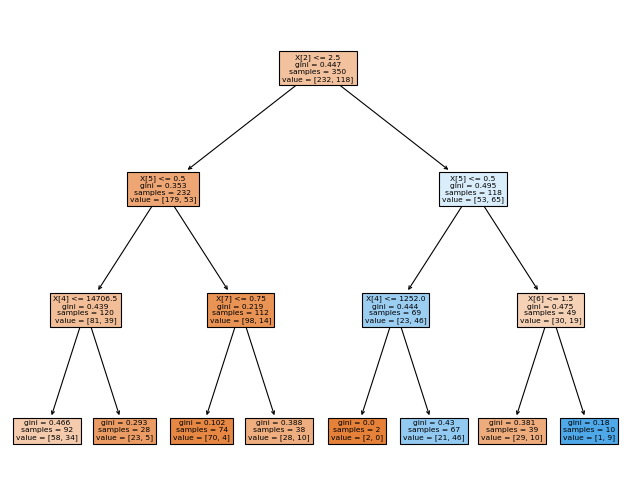

Accuracy: 0.6866666666666666


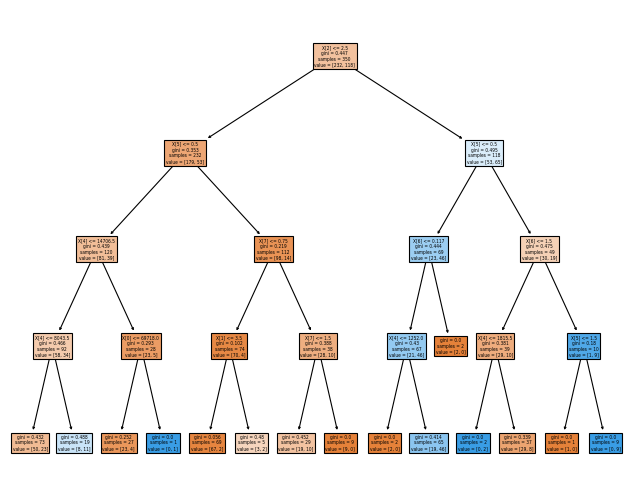

Accuracy: 0.6466666666666666


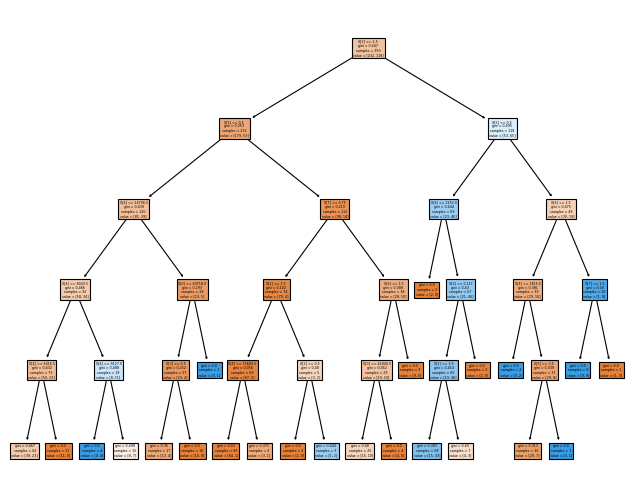

Accuracy: 0.5866666666666667


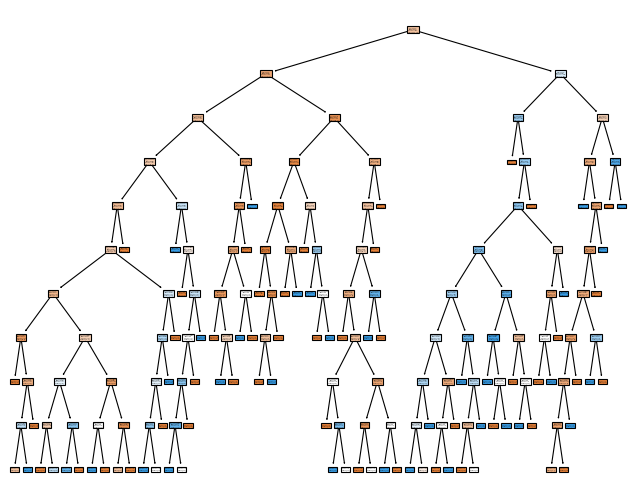

Accuracy: 0.5866666666666667


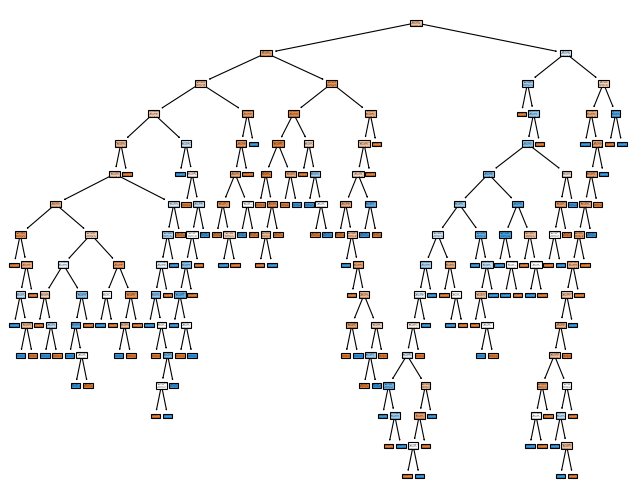

Accuracy: 0.5666666666666667


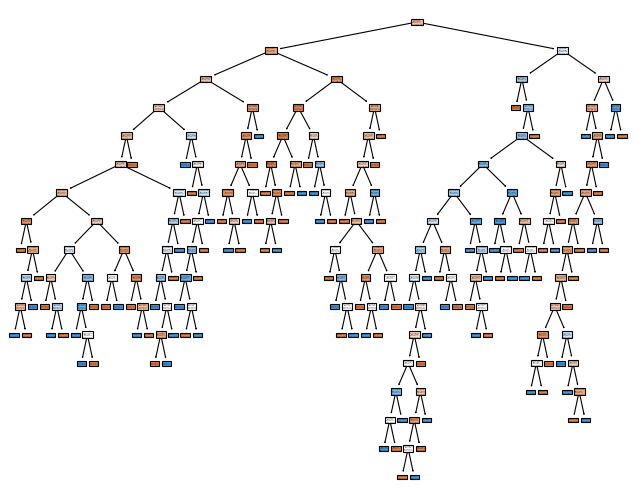

In [25]:
depth = [1,2,3,4,5,10,15,20]

for i in range(len(depth)):
    model = DecisionTreeClassifier(criterion='gini', max_depth=depth[i])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Accuracy: {}'.format(model.score(x_test, y_test)))
    plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
    plot_tree(model, filled=True)
    plt.show()

----

In [26]:
fraud = pd.read_csv('MotorInsuranceFraudClaimABTFull .csv')
fraud = fraud.dropna()
target = fraud['Fraud Flag']
data = fraud.drop(['Fraud Flag'], axis=1)
data = data.apply(LabelEncoder().fit_transform)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = .9, random_state=1)

In [28]:
print(len(x_train))
len(x_test)

16


151


Test Results
Accuracy: 0.9337748344370861
Recall: 1.0
Precision: 0.9337748344370861
f1: 0.9337748344370861
[[93 10]
 [ 0 48]]


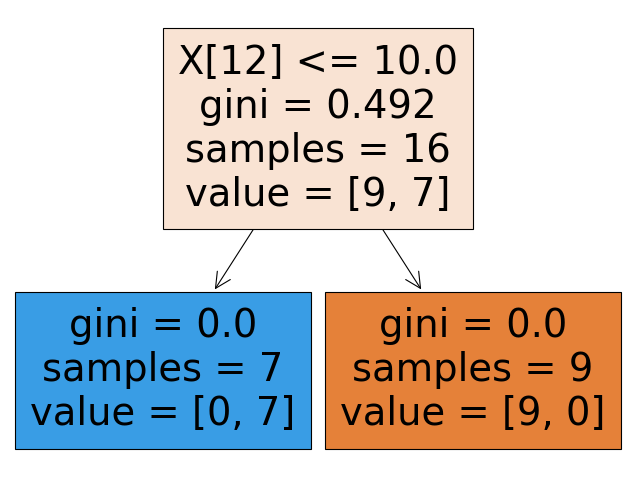

In [29]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('\nTest Results')
print('Accuracy: {}'.format(model.score(x_test, y_test)))
print('Recall: {}'.format(recall_score(y_test, model.predict(x_test))))
print('Precision: {}'.format(precision_score(y_test, y_pred, average='micro')))
print('f1: {}'.format(f1_score(y_test, y_pred, average='micro')))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_tree(model, filled=True)
plt.show()


Test Results
Accuracy: 0.9337748344370861
Recall: 1.0
Precision: 0.9337748344370861
f1: 0.9337748344370861
[[93 10]
 [ 0 48]]


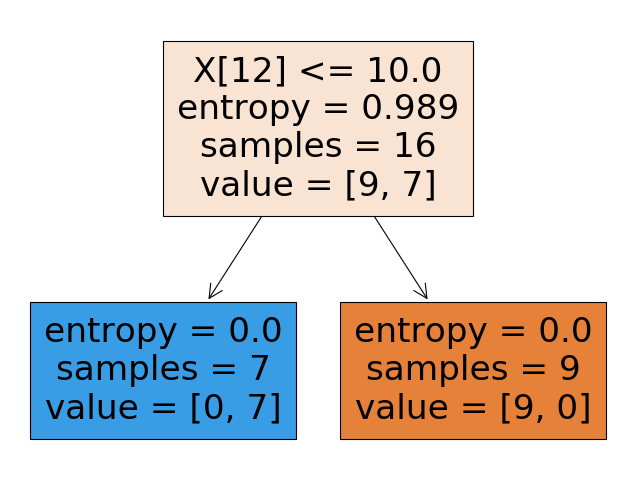

In [30]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print('\nTest Results')
print('Accuracy: {}'.format(model.score(x_test, y_test)))
print('Recall: {}'.format(recall_score(y_test, model.predict(x_test))))
print('Precision: {}'.format(precision_score(y_test, y_pred, average='micro')))
print('f1: {}'.format(f1_score(y_test, y_pred, average='micro')))
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plot_tree(model, filled=True)
plt.show()